## Prosper Loan Data 
### Exploratory Analysis

### Preliminary Wrangling

This document explores a dataset containing 113,937 loans with 81 features each, such as borrower's APR (Annual Percentage Rate), loan amount, borrower rate / interest rate, credit grade, Prosper Rating,loan status, borrower income, etc. The main objective of this analysis is to understand how each feature influences borrowers' APR and therefore, how loans are defined and taken.

In [33]:
#Import the libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [34]:
loan = pd.read_csv('prosperLoanData.csv')

In [35]:
loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [36]:
loan.shape

(113937, 81)

In [37]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [38]:
loan.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [39]:
loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [40]:
loan.ProsperScore.value_counts()

4.0     12595
6.0     12278
8.0     12053
7.0     10597
5.0      9813
3.0      7642
9.0      6911
2.0      5766
10.0     4750
11.0     1456
1.0       992
Name: ProsperScore, dtype: int64

In [41]:
sum(loan.duplicated()) 

#no duplicates were found in the dataset

0

In [42]:
# Crete a new dataframe by selecting only the columns that are important for us by now to study the impact on Borrower APR
loansub = loan[['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term', 'ProsperRating (Alpha)','EmploymentStatus']]
loansub

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed
...,...,...,...,...,...,...
113932,10000,0.22354,4333.333333,36,C,Employed
113933,2000,0.13220,8041.666667,36,A,Employed
113934,10000,0.23984,2875.000000,60,D,Employed
113935,15000,0.28408,3875.000000,60,C,Full-time


In [43]:
loansub.BorrowerAPR

0         0.16516
1         0.12016
2         0.28269
3         0.12528
4         0.24614
           ...   
113932    0.22354
113933    0.13220
113934    0.23984
113935    0.28408
113936    0.13189
Name: BorrowerAPR, Length: 113937, dtype: float64

In [44]:
# Remove loans with missing borrower APR information
loansub = loansub[~loansub.BorrowerAPR.isna()]
loansub

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term,ProsperRating (Alpha),EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed
...,...,...,...,...,...,...
113932,10000,0.22354,4333.333333,36,C,Employed
113933,2000,0.13220,8041.666667,36,A,Employed
113934,10000,0.23984,2875.000000,60,D,Employed
113935,15000,0.28408,3875.000000,60,C,Full-time


#### What is the structure of your dataset?

The dataset contains 113,937 loans with 81 features, such as LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha), EmploymentStatus, among others

#### What is/are the main feature(s) of interest in your dataset?

The most important features of our dataset are those that will help us to predict and explain Borrower's APR (Annual Percentage Rate). By now, we decided that those would be: LoanOriginalAmount, BorrowerAPR, StatedMonthlyIncome, Term, ProsperRating (Alpha) and EmploymentStatus

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

One can expect that all variables listed above will support the investigation. Moreover, it is important to highlight that
we believe that variables such as loan total amount and Prosper Rating will have a negative effect on APR (the better the ratig and larger amounts would result in lower APRs)

### Univariate Exploration

In [45]:
loansub.describe()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,Term
count,113912.000000,113912.000000,1.139120e+05,113912.000000
mean,8338.015661,0.218828,5.606973e+03,40.831308
std,6245.940592,0.080364,7.478338e+03,10.437112
min,1000.000000,0.006530,0.000000e+00,12.000000
25%,4000.000000,0.156290,3.200000e+03,36.000000
50%,6500.000000,0.209760,4.666667e+03,36.000000
75%,12000.000000,0.283810,6.817083e+03,36.000000
max,35000.000000,0.512290,1.750003e+06,60.000000


In [46]:
loansub.columns

Index(['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome', 'Term',
       'ProsperRating (Alpha)', 'EmploymentStatus'],
      dtype='object')

In [47]:
# As a good practice, lets change columns' names to make it easier to write and do our analysis

loansub.rename(columns= {"LoanOriginalAmount":"Amount", "ProsperRating (Alpha)": "Rating", "StatedMonthlyIncome" : "MonthlyIncome", "BorrowerAPR": "APR"}, inplace= True)
loansub.head()

C:\Users\julia\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Amount,APR,MonthlyIncome,Term,Rating,EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed


1) Borrower APR 

In [48]:
# What are the most frequent APRs?
loansub.APR.value_counts(normalize=True).head(10)

0.35797    0.032235
0.35643    0.014432
0.37453    0.011061
0.30532    0.007918
0.29510    0.006558
0.35356    0.006329
0.29776    0.006207
0.15833    0.005724
0.24246    0.005311
0.24758    0.005276
Name: APR, dtype: float64

In [49]:
loansub.APR.describe()

count    113912.000000
mean          0.218828
std           0.080364
min           0.006530
25%           0.156290
50%           0.209760
75%           0.283810
max           0.512290
Name: APR, dtype: float64

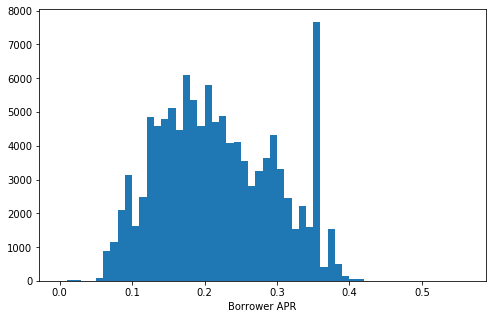

In [50]:
#Plot a Histogram to see APR's distribution
bins = np.arange(0, loansub.APR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loansub, x = 'APR', bins = bins);
plt.xlabel('Borrower APR');

The distribution of APR looks multimodal. 
There is an important peak at 0.35797, being this the biggest. Moreover, one can highlight another peak centered at 0.2, followed by other centered at 0.3 and then 0.1.
Loans greater than 0.4 are scarce. The higher loan is at 0.512290 and seems an outlier. There are few loans with borrower's APR higher than 0.4.

2) Loan Original Amount

In [51]:
loansub.Amount.value_counts(normalize=True).head(10)

4000     0.125808
15000    0.108909
10000    0.097488
5000     0.061346
2000     0.053252
3000     0.050434
25000    0.031867
20000    0.028891
1000     0.028101
2500     0.026257
Name: Amount, dtype: float64

In [52]:
loansub.Amount.describe()

count    113912.000000
mean       8338.015661
std        6245.940592
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: Amount, dtype: float64

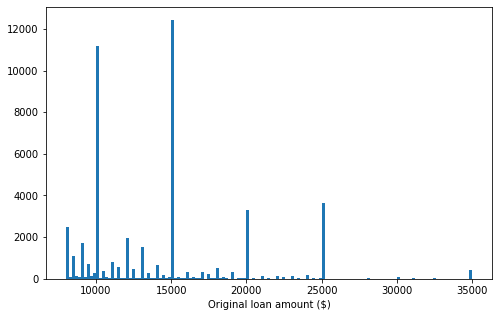

In [53]:
bins = np.arange(8000, loansub.Amount.max()+200, 200)
plt.figure(figsize=[8, 5])
plt.hist(data = loansub, x = 'Amount', bins = bins);
plt.xlabel('Original loan amount ($)');

The Loan Amount Distribution seems a bit right screwed. The majority of the loans seems to be lower 20k. There are large peaks at 10k, 15k, medium ones at 5k, 20k and 25k and a smaller one at 35k. 
Looking at the describe function result, one can conclude that loans are multiples of 1k (Minimum value).

3) Stated Monthly Income

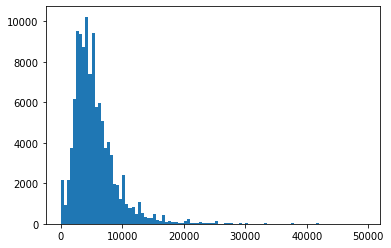

In [54]:
# Distribution of the monthly income
bins_smi = np.arange(0, 50000, 500)
plt.hist(data = loansub, x = 'MonthlyIncome', bins=bins_smi);

In [55]:
loansub.MonthlyIncome.value_counts(normalize=True).head(10)

4166.666667    0.030919
5000.000000    0.029751
3333.333333    0.025599
3750.000000    0.021315
5416.666667    0.020841
5833.333333    0.020358
6250.000000    0.019980
2500.000000    0.019805
4583.333333    0.019410
6666.666667    0.018962
Name: MonthlyIncome, dtype: float64

In [56]:
loansub.MonthlyIncome.max()

1750002.916667

The distribution of stated monthly income is right screwed, with most of stated monthly income less than 25k.

In [57]:
loansub.shape

(113912, 6)

In [58]:
greater=loansub[loansub.MonthlyIncome>=25000]
greater.shape    

# only 653 out of 113912 loans have stated monthly income higher than 25k, so we can consider them outliers.

(653, 6)

In [59]:
(loansub.MonthlyIncome>=25000).sum()/float(loansub.shape[0])  #Only 0.57% of the borrowers have monthly income higher than 25k

0.0057324952594985604

In [60]:
rich=loansub[loansub.MonthlyIncome>=25000]
rich.groupby('MonthlyIncome')['Amount'].value_counts(normalize=True)

MonthlyIncome  Amount
2.500000e+04   25000     0.252033
               15000     0.154472
               10000     0.089431
               4000      0.065041
               12000     0.048780
                           ...   
4.166667e+05   2000      1.000000
4.666667e+05   4000      1.000000
4.833333e+05   7500      1.000000
6.185478e+05   4000      1.000000
1.750003e+06   4000      1.000000
Name: Amount, Length: 431, dtype: float64

In [61]:
rich2=loansub[loansub.MonthlyIncome>=100000]
rich2.groupby('MonthlyIncome')['Amount'].value_counts(normalize=True)

MonthlyIncome  Amount
1.000000e+05   6000      1.0
1.033341e+05   5000      1.0
1.083333e+05   1000      1.0
1.087500e+05   12765     1.0
1.208333e+05   15000     1.0
1.404167e+05   2000      1.0
1.500000e+05   4000      1.0
1.583333e+05   25000     1.0
1.850818e+05   5000      0.5
               25000     0.5
2.083333e+05   12500     1.0
2.500000e+05   4000      1.0
3.944000e+05   2000      1.0
4.166667e+05   2000      1.0
4.666667e+05   4000      1.0
4.833333e+05   7500      1.0
6.185478e+05   4000      1.0
1.750003e+06   4000      1.0
Name: Amount, dtype: float64

Very rich people seems to borrow really low amounts

In [62]:
loansub=loansub[loansub.MonthlyIncome<25000]
loansub.shape

(113259, 6)

In [63]:
x = 113912 - 653
x

113259

In [64]:
(loansub.MonthlyIncome>25000).sum() # Double Checking if we exclude the outliers, meaning those with income greater than 25k

0

4) Term, ProsperRating (Alpha) and EmploymentStatus

In [65]:
loansub.head(12)

,Amount,APR,MonthlyIncome,Term,Rating,EmploymentStatus
0,9425,0.16516,3083.333333,36,NaN,Self-employed
1,10000,0.12016,6125.000000,36,A,Employed
2,3001,0.28269,2083.333333,36,NaN,Not available
3,10000,0.12528,2875.000000,36,A,Employed
4,15000,0.24614,9583.333333,36,D,Employed
5,15000,0.15425,8333.333333,60,B,Employed
6,3000,0.31032,2083.333333,36,E,Employed
7,10000,0.23939,3355.750000,36,C,Employed
8,10000,0.07620,3333.333333,36,AA,Employed
9,10000,0.07620,3333.333333,36,AA,Employed


In [66]:
loansub.EmploymentStatus.value_counts()

Employed         66925
Full-time        26240
Self-employed     6035
Not available     5324
Other             3804
Part-time         1088
Not employed       835
Retired            794
Name: EmploymentStatus, dtype: int64

In [67]:
loansub['Rating'].value_counts()

C     18241
B     15458
A     14424
D     14218
E      9767
HR     6908
AA     5322
Name: Rating, dtype: int64

In [68]:
# Convert ProsperRating and Employment status into ordered categorical types
rate_order = ['HR','E','D','C','B','A','AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = rate_order)
loansub['Rating'] = loansub['Rating'].astype(ordered_var)

emp_order = ['Employed','Self-employed','Full-time','Part-time','Retired','Other','Not employed', 'Not available']
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                    categories = emp_order)
loansub['EmploymentStatus'] = loansub['EmploymentStatus'].astype(ordered_var)

C:\Users\julia\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\julia\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


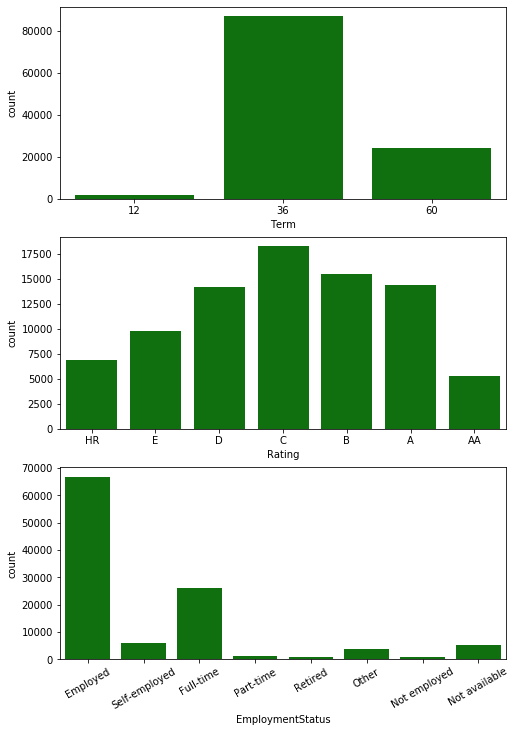

In [69]:
fig, ax = plt.subplots(3,1, figsize = [8,12])

sb.countplot(data = loansub, x = 'Term', color = 'green', ax=ax[0])
sb.countplot(data = loansub, x = 'Rating', color = 'green', ax = ax[1])
sb.countplot(data = loansub, x = 'EmploymentStatus', color = 'green', ax = ax[2]);
plt.xticks(rotation=30);

Findings:
 - The majority of the loans has 36 months
 - The most frequent Prosper Rating is C, but it is also common to have Prospers rated as B, D and A
 - Concerning the Employment Status, the majority of the borrowers are employed, followed by those with full-time jobs

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The distribution of borrowers APR looks multimodal. The APR variable has a mean of nearly 0.21, with a standard deviation of 0.08. 
The majority of the values lays down between 0.05 and 0.4. 
No unusual points seem to appear, there is just a peak on APR equal to 0.35797, being this the most common one and representing nearly 3,2% of the database. There was no to perform any transformations.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The distributions of monthly income seems right screwed. Only 0.05% of the borrowers have  monthly incomes higher tham 25k. Therefore, we considered borrowers with income greater than 25k outliers and exclude those from our analysis.

Moreover, what was unexpected for me, it seems to be a negative correlation between monthly salary and borrowed amount. Borrowers with monthly salary greater than 100k have low loans' amounts. 

The unique kind of transformation was to make Proper Rating and Employment Status Categorical Variables, sorting them. Thus, it it will be easier to understand the relationship between these variables and Loan Amount and Borrower APR in the future.

### Bivariate Exploration

1) Relationship between Prosper Rating & Borrower APR

In [72]:
new= loansub.groupby('Rating')['APR'].mean()
new
gen_order=['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

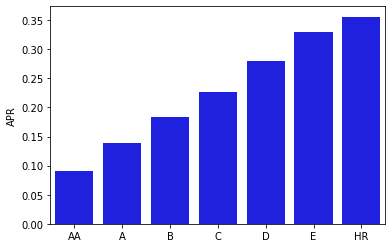

In [73]:
sb.barplot(new.index.values,new, color='blue', order=gen_order);

As expected, borrowers with higher ratings received lower APRs

2) Lets separate Numerical Variables from Categorical Values

In [74]:
num_vars = ['Amount', 'APR', 'MonthlyIncome']
cat_vars = ['Term', 'Rating', 'EmploymentStatus']

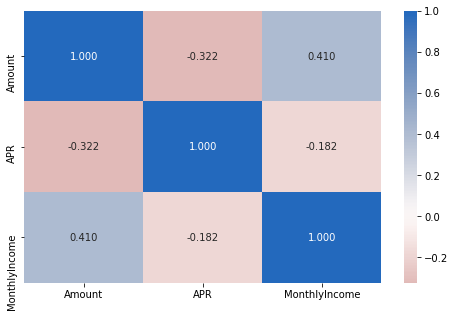

In [75]:
#Plot a Heatmap to see the correlation between the variables
plt.figure(figsize = [8, 5])
sb.heatmap(loansub[num_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);

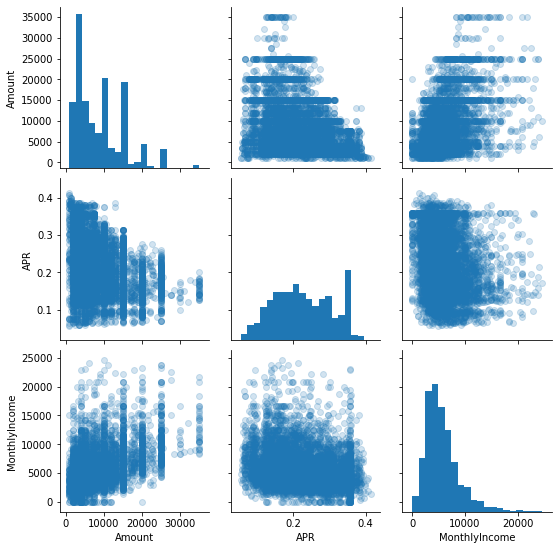

In [76]:
# Matrix: sample 10000 loans so that plots are clearer and render faster
loansub_samp = loansub.sample(10000)
g = sb.PairGrid(data = loansub_samp.dropna(), vars = num_vars)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=0.2);

 - The strongest relationship is between Loan Amount and Monthly Income. The correlation coeficient is 0.41, therefore, 
 there is a positive relation between the borrowers' monthly income and the amount is lent to them, as expected.
 
 - The second strongest relationship is between Borrower APR and Loan Amount. The correlation coefficient is -0.322, the scatter plot also reinforces that these two variables are negatively correlated, meaning that higher APRs results in lower borrowed amounts. 
 
 - There is a weak however negative relationship between Borrowers' APR and their monthly income. 
 - As we have seen, higher ratings, what many times hypothetically can be related to higher monthly incomes, have lower APR's means.
 
Trying to sum up our thoughts, higher Monthly Income Results in higher Loan Amounts, which in its turn has a negative relationship with Borrower APR. It is probable that better rated borrowers are those with higher Monthly Income.

3) Lets see how borrowers' APR, monthly income and loans' amount correlate with the categorical variables

C:\Users\julia\anaconda3\lib\site-packages\seaborn\axisgrid.py:1264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 720x720 with 0 Axes>

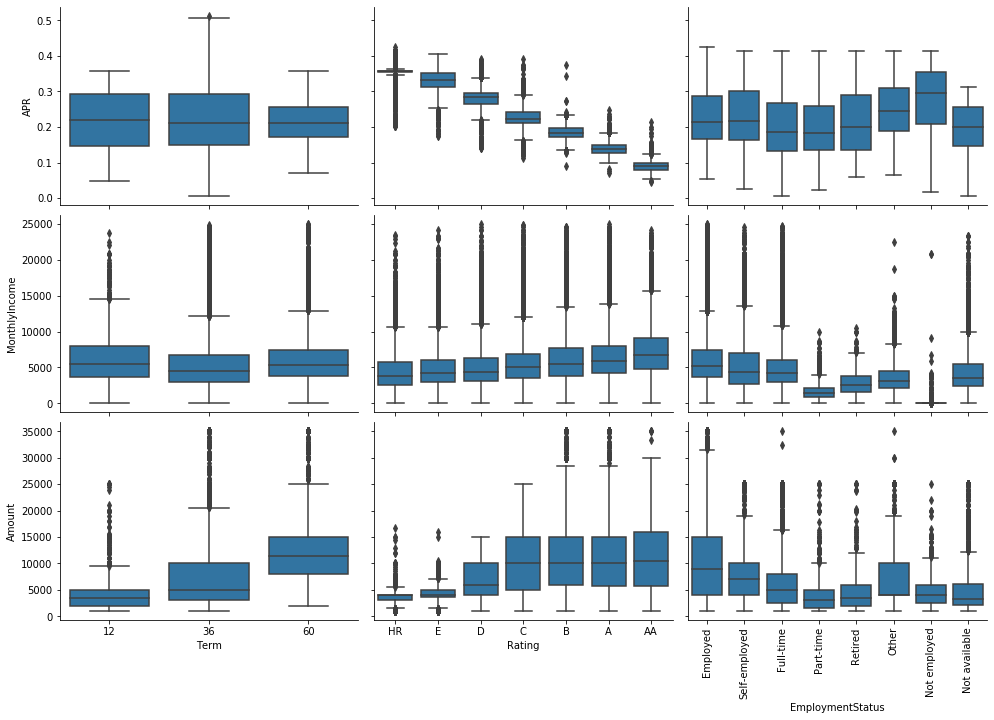

In [77]:
def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = loansub, y_vars = ['APR', 'MonthlyIncome', 'Amount'], 
                x_vars = cat_vars, size = 3, aspect = 1.5)
g.map(boxgrid);
plt.xticks(rotation=90);

Findings:
    - Longer Terms are related with higher loan amounts
    - The borrower APR decreases with the better ratings, AA Rating has the lowest APR
    - As expected, borrowers with higher Ratings have higher monthly income and higher loan amounts
    - Employed, self-employed and full time borrowers have more monthly income and loan amount than part-time, retired and not employed borrowers

Finally, let's look at relationships between the three categorical features

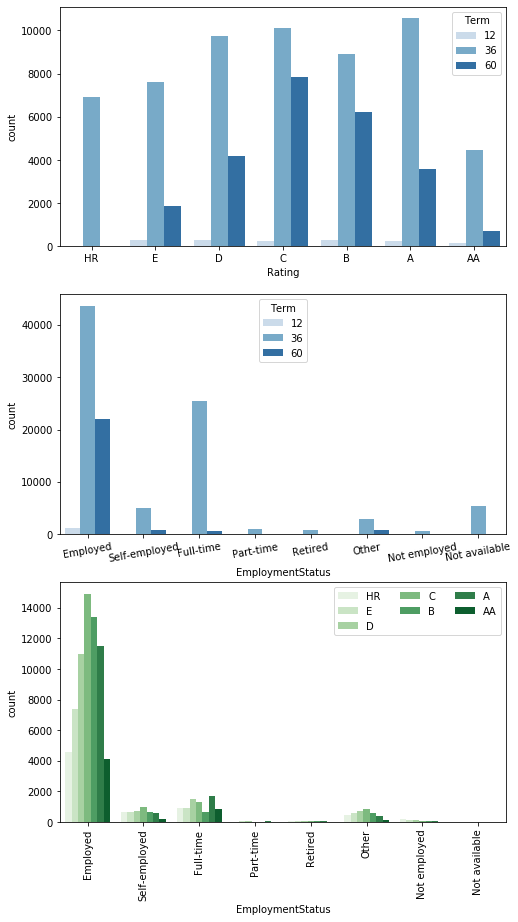

In [78]:
plt.figure(figsize = [8, 15])

# subplot 1: Prosper rating vs term
plt.subplot(3, 1, 1)
sb.countplot(data = loansub, x = 'Rating', hue = 'Term', palette = 'Blues')

# subplot 2: employment status vs. term
ax = plt.subplot(3, 1, 2)
sb.countplot(data = loansub, x = 'EmploymentStatus', hue = 'Term', palette = 'Blues')
plt.xticks(rotation=10)

# subplot 3: Prosper rating vs. employment status, use different color palette
ax = plt.subplot(3, 1, 3)
sb.countplot(data = loansub, x = 'EmploymentStatus', hue = 'Rating', palette = 'Greens')
ax.legend(loc = 1, ncol = 3); # re-arrange legend to remove overlapping
plt.xticks(rotation=90);

 1) Rating vs. Term:
 - 36 months loans is the most common type of loan among all rating categories, standing out from 12 and 60 month loans.
 - HR Rating, the worst rating a borrower can have, has only 36 month loans
 - When looking at the 60 month loans, they are more common among B and C rating' categories
  
  2) Employment Status vs. Term
 - The 36 months loans is the most common type of loan among all employment status categories
 - Employed and full-time workers borrowers seem to receive more loans
  
  3) Employment Status vs. Rating
 - There is lack of information on part-time, retired, not employed borrowers and not available employment status, in order to u show their relationship with Prosper ratings 

With the preliminary look at bivariate relationships out of the way, I want to dig into some of the relationships more. Thus, lets see how Borrower APR and loan amount and also Borrower APR vs. Ratings are related to one another for all of the data

#### Borrower APR vs. Loan Amount

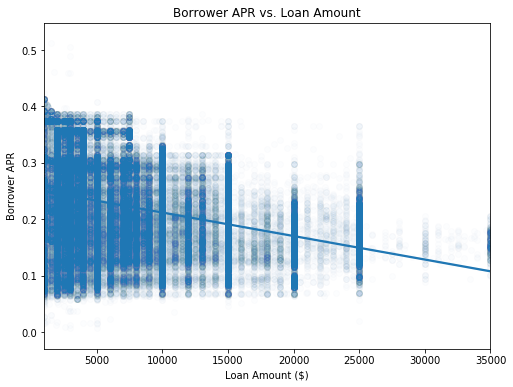

In [79]:
plt.figure(figsize = [8, 6])
sb.regplot(data = loansub, x = 'Amount', y = 'APR', scatter_kws={'alpha':0.01});  #there was no need to perform this analysis in log
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Loan Amount');

There is a negative relationship between borrower APR and Loan Amount.
Moreover, the APR variable has a large range for different sizes of the loan amounts, but the range of APR decrease with the increase of loan amount.

#### Borrower APR vs. Borrower Rating

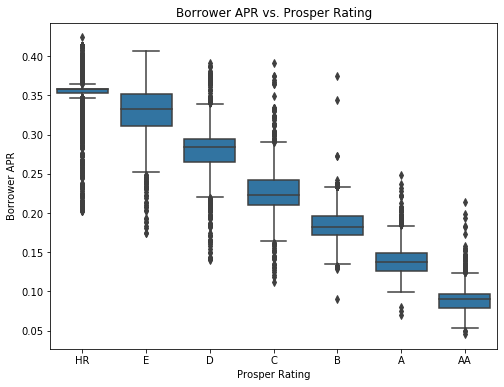

In [80]:
plt.figure(figsize=[8,6])
default_color = sb.color_palette()[0]
sb.boxplot(data=loansub, x='Rating', y='APR', color=default_color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Borrower APR vs. Prosper Rating');

As illustrated by the first graphic we plotted in this Bivariate Exploration, there is a negative relationship between Prosper Rating and Borrower APR. For higher / better Ratings, Borrower APR are lower. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The borrower APR is negative related with the loan amount, the larger the amount, the lower the APR. It also shows that at different size of the loan amount, the APR has a large range, but the range of APR decrease with the increase of loan amount. 
Borrower APR also has a negative relationship with Prosper rating, meaning that the APR decreases with the better ratings.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There is a positive relationship between Loan Amount and Monthly Income. It does make sense once borrowers with higher monthly income would have larger capacities to pay for larger loan amounts.
In addition, as expected borrowers with better ratings  have larger monthly income and loan amount. 
There is a relation between prosper rating and term. The most common loan term is the one with 36 months lenght. It is the most commom one among all categories. Proportionally, there are more 60 month loans on B and C ratings categories. For HR borrowers, there are only 36 months loans-

### Multivariate Exploration

The main thing I want to explore in this part of the analysis is how the categorical variables Rating and Term play with Borrower APR and Loan Amount. We will also check variables such as Monthly Income and Employment Status.

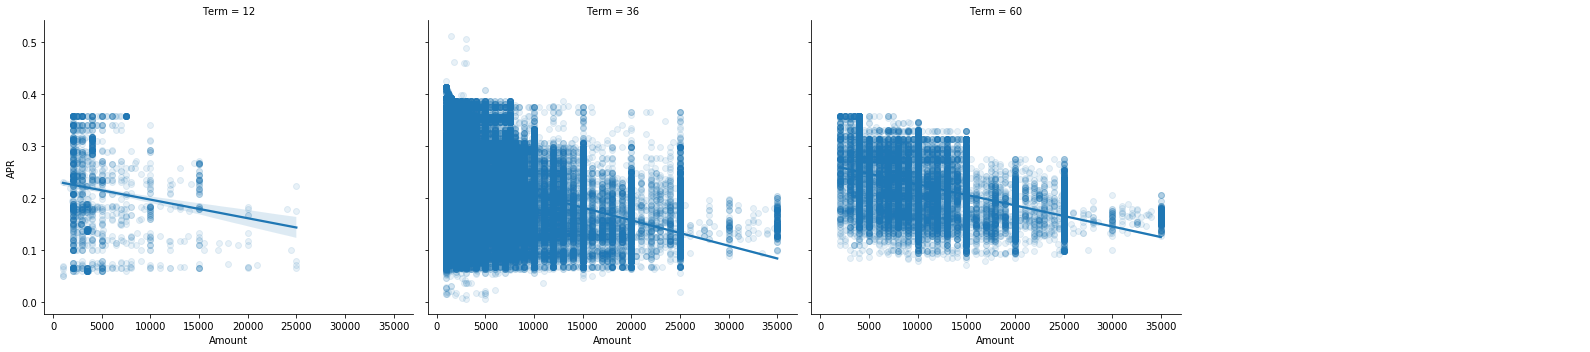

In [81]:
# Term effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loansub, aspect=1.1, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'Amount', 'APR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

Term doesn't seem to have effect on the relationship between APR and loan amount

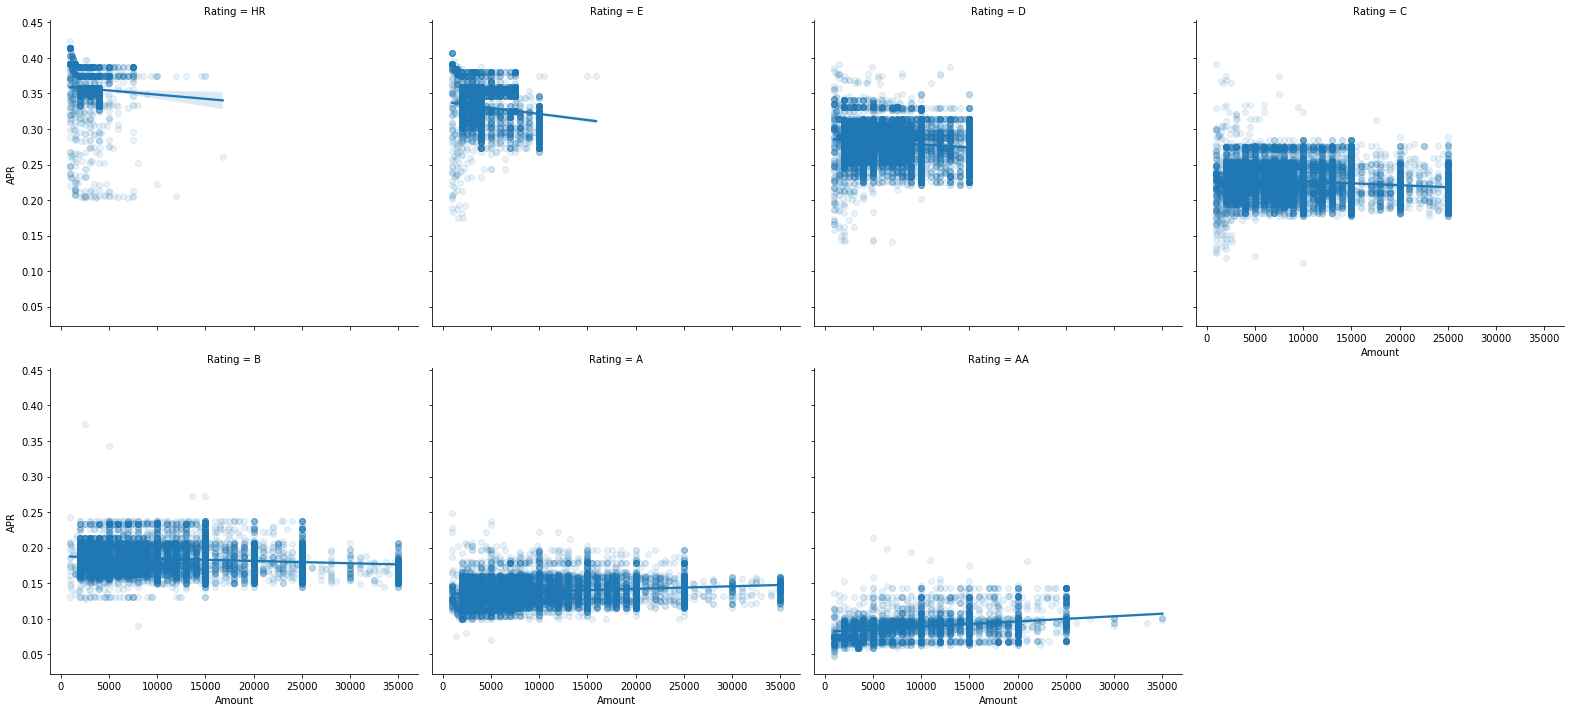

In [82]:
# Prosper rating effect on relationship of APR and loan amount
g=sb.FacetGrid(data=loansub, aspect=1.1, height=5, col='Rating', col_wrap=4)
g.map(sb.regplot, 'Amount', 'APR', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();

As previously stated, better ratings result in higher loan amounts and lower borrower APR.
Although the relationship between borrower APR and loan amount is negative, it turns to slightly positive when the Prosper ratings are equal to A or AA. 
One can try to explain this by the fact that borrowers with A or AA ratings usually borrow more money, thus higher APRs could prevent them borrow even more. In the other hand, lower ratings borrowers tend to borrow less money, decreasing APR could encourage them to borrow more.

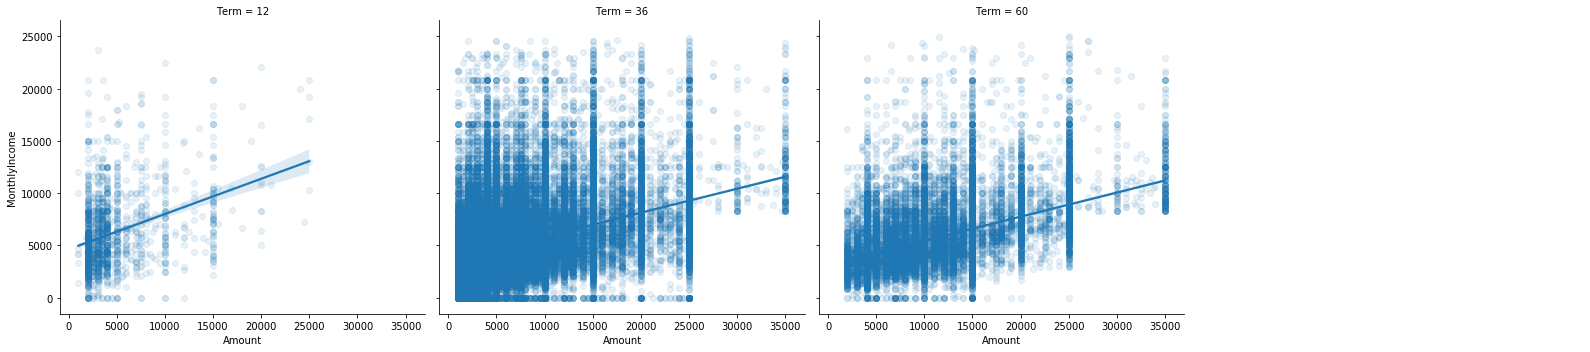

In [83]:
# Prosper Term effect on relationship of Montly Income and Loan Amount
g=sb.FacetGrid(data=loansub, aspect=1.1, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'Amount', 'MonthlyIncome', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend(); 

As expected, there is a positive relationship between Monthly Income and Loan Amount for all the 3 Loan Terms. One can also highlight that, for short term loans - 12 months, it is more common to see lower amounts and lower monthly incomes.

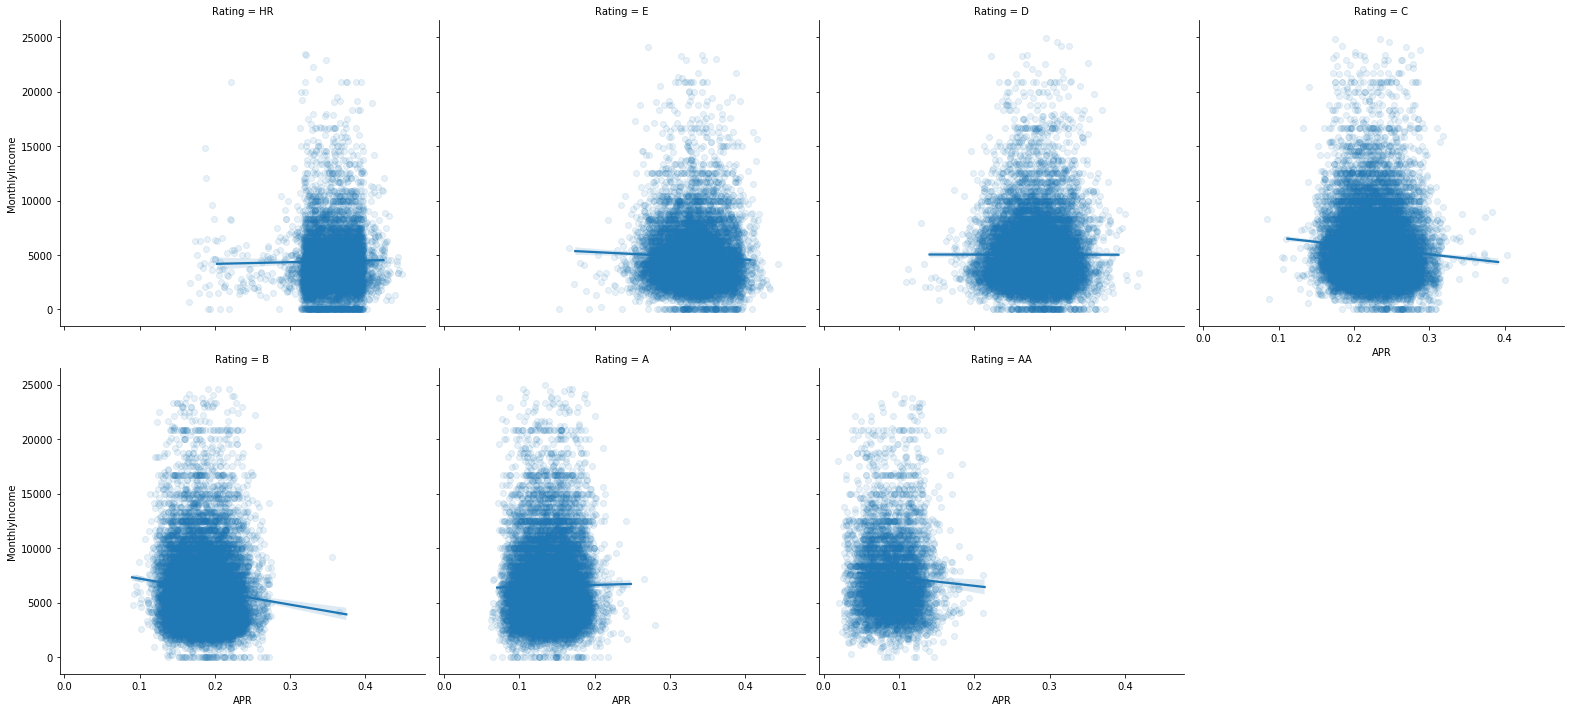

In [84]:
# Prosper rating effect on relationship of Montly Income and APR
g=sb.FacetGrid(data=loansub, aspect=1.1, height=5, col='Rating', col_wrap=4)
g.map(sb.regplot, 'APR', 'MonthlyIncome', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend();  

As previously stated, borrowers with higher Ratings have lower APRs and commonly higher Monthly Income. 
Although we see a negative relationship between APR and Monthly Income, it doesn't seem true for Ratings equal to A, HR and D. It couldn't find a clear explanation for that.

### Borrower APR across Rating and Term

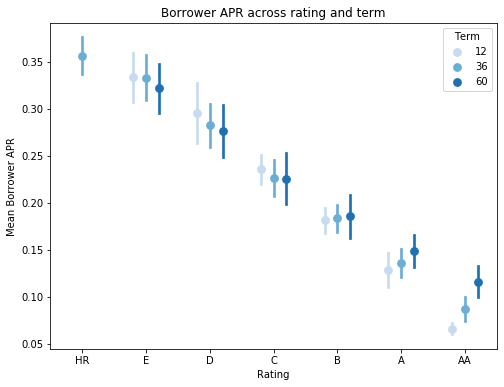

In [85]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loansub, x = 'Rating', y = 'APR', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across rating and term')
plt.ylabel('Mean Borrower APR')
ax.set_yticklabels([],minor = True);

The borrower APR decreases with the increase of borrow term for people with HR-C ratings.
However, for borrowers with B-AA ratings, the APR increases with the increase of borrow term.

### Now, by curiosity, lets take a look at the Employment Status Variable and see how it comes across Rating vs. APR

In [86]:
#There is lack of information on part-time, retired, not employed borrowers 
#and not available employment status, in order to u show their relationship with Prosper ratings 

loansub_employment=loansub[(loansub.EmploymentStatus == 'Employed') | (loansub.EmploymentStatus == 'Full-time') | (loansub.EmploymentStatus == 'Self-employed') | (loansub.EmploymentStatus == 'Other')]
loansub_employment.shape

(103004, 6)

In [87]:
loansub_employment[(loansub_employment.EmploymentStatus== 'Part-Time')] #checking we really excluded it 

,Amount,APR,MonthlyIncome,Term,Rating,EmploymentStatus


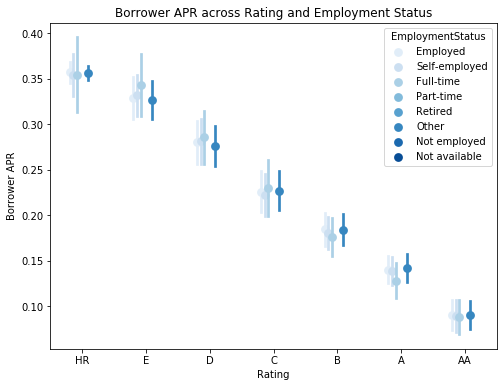

In [88]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = loansub_employment, x = 'Rating', y = 'APR', hue = 'EmploymentStatus',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci='sd')
plt.title('Borrower APR across Rating and Employment Status')
plt.ylabel('Borrower APR')
ax.set_yticklabels([],minor = True);

Employed borrowers take higher loan amounts, while full-time take lower amounts among all Ratings Categories. As expected the loan amount increases in for all employment status with higher ratings.

### Now, lets look at the rating and term effects on stated monthly income and loan original amount variables

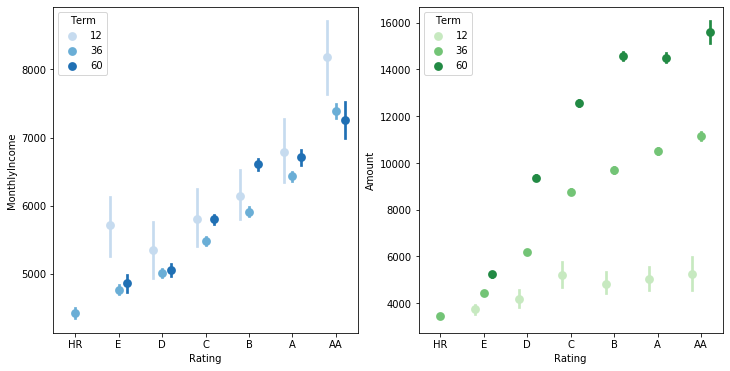

In [89]:
fig, ax = plt.subplots(ncols=2, figsize=[12,6])
sb.pointplot(data = loansub, x = 'Rating', y = 'MonthlyIncome', hue = 'Term',
           palette = 'Blues', linestyles = '', dodge = 0.4, ax=ax[0])
sb.pointplot(data = loansub, x = 'Rating', y = 'Amount', hue = 'Term',
           palette = 'Greens', linestyles = '', dodge = 0.4, ax=ax[1]);

When looking at the monthly income graphic, one can identify that borrowers with higher monthly incomes have higher ratings. Moreover, one can say that, among all different rating categories, there is the same pattern in the loan term, being the 12 months loan the most common one, except for B and HR rating categories.
Also, surprisingly loans with 60 months are more common than those with 36 months long, except for borrowers with AA rating category.
However, when looking at the loan amount, we can notice a strong relationship between loan term and Prosper rating. On better Prosper ratings, the loan amount on all three terms increases, the size of the increase / loan amplitude between terms also becomes larger.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The main focus of the analysis was trying to understand the relationship between Prosper APR and Loan Amount. Therefore, I studied how Prosper Rating could impact this relationship. 
 
The multivariate exploration showed that the relationship between borrower APR and loan amount turns from negative to slightly positive with Prosper Ratings equal to A and AA. 

Moreover, I explored the rating and term effects on loan amount and with better Prosper ratings, the loan amount of all three terms increases - the increase amplitude of loan amount among the terms also becomes bigger.

I also tried to better understand the relationship between Montly Income and APR, when looking at different Prosper Ratings. As previously stated, borrowers with higher Ratings have lower APRs and commonly higher Monthly Income. 
Although we see a negative relationship between APR and Monthly Income, it doesn't seem true for Ratings equal to A, HR and D. It couldn't find a clear explanation for that.

### Were there any interesting or surprising interactions between features?

An interesting finding was that, for borrowers with HR-C ratings, APRs decrease with the increase of the loan term, however, for borrowers with B-AA ratings, the APR increase on longer loan terms.
Also, as mentioned above, one can highlight that the fact that the relationship between borrower APR and loan amounts turns from negative to slightly positive on A and AA ratings is quite surprising.